In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.decomposition import PCA

## Задача

Поработаем с датасетом о [вине](https://www.kaggle.com/harrywang/wine-dataset-for-clustering)

Прочитать датасет, построить pairplot ( `sns.pairplot()` ), кластеризовать на 3 группы.

Объяснить смысл кластеров.

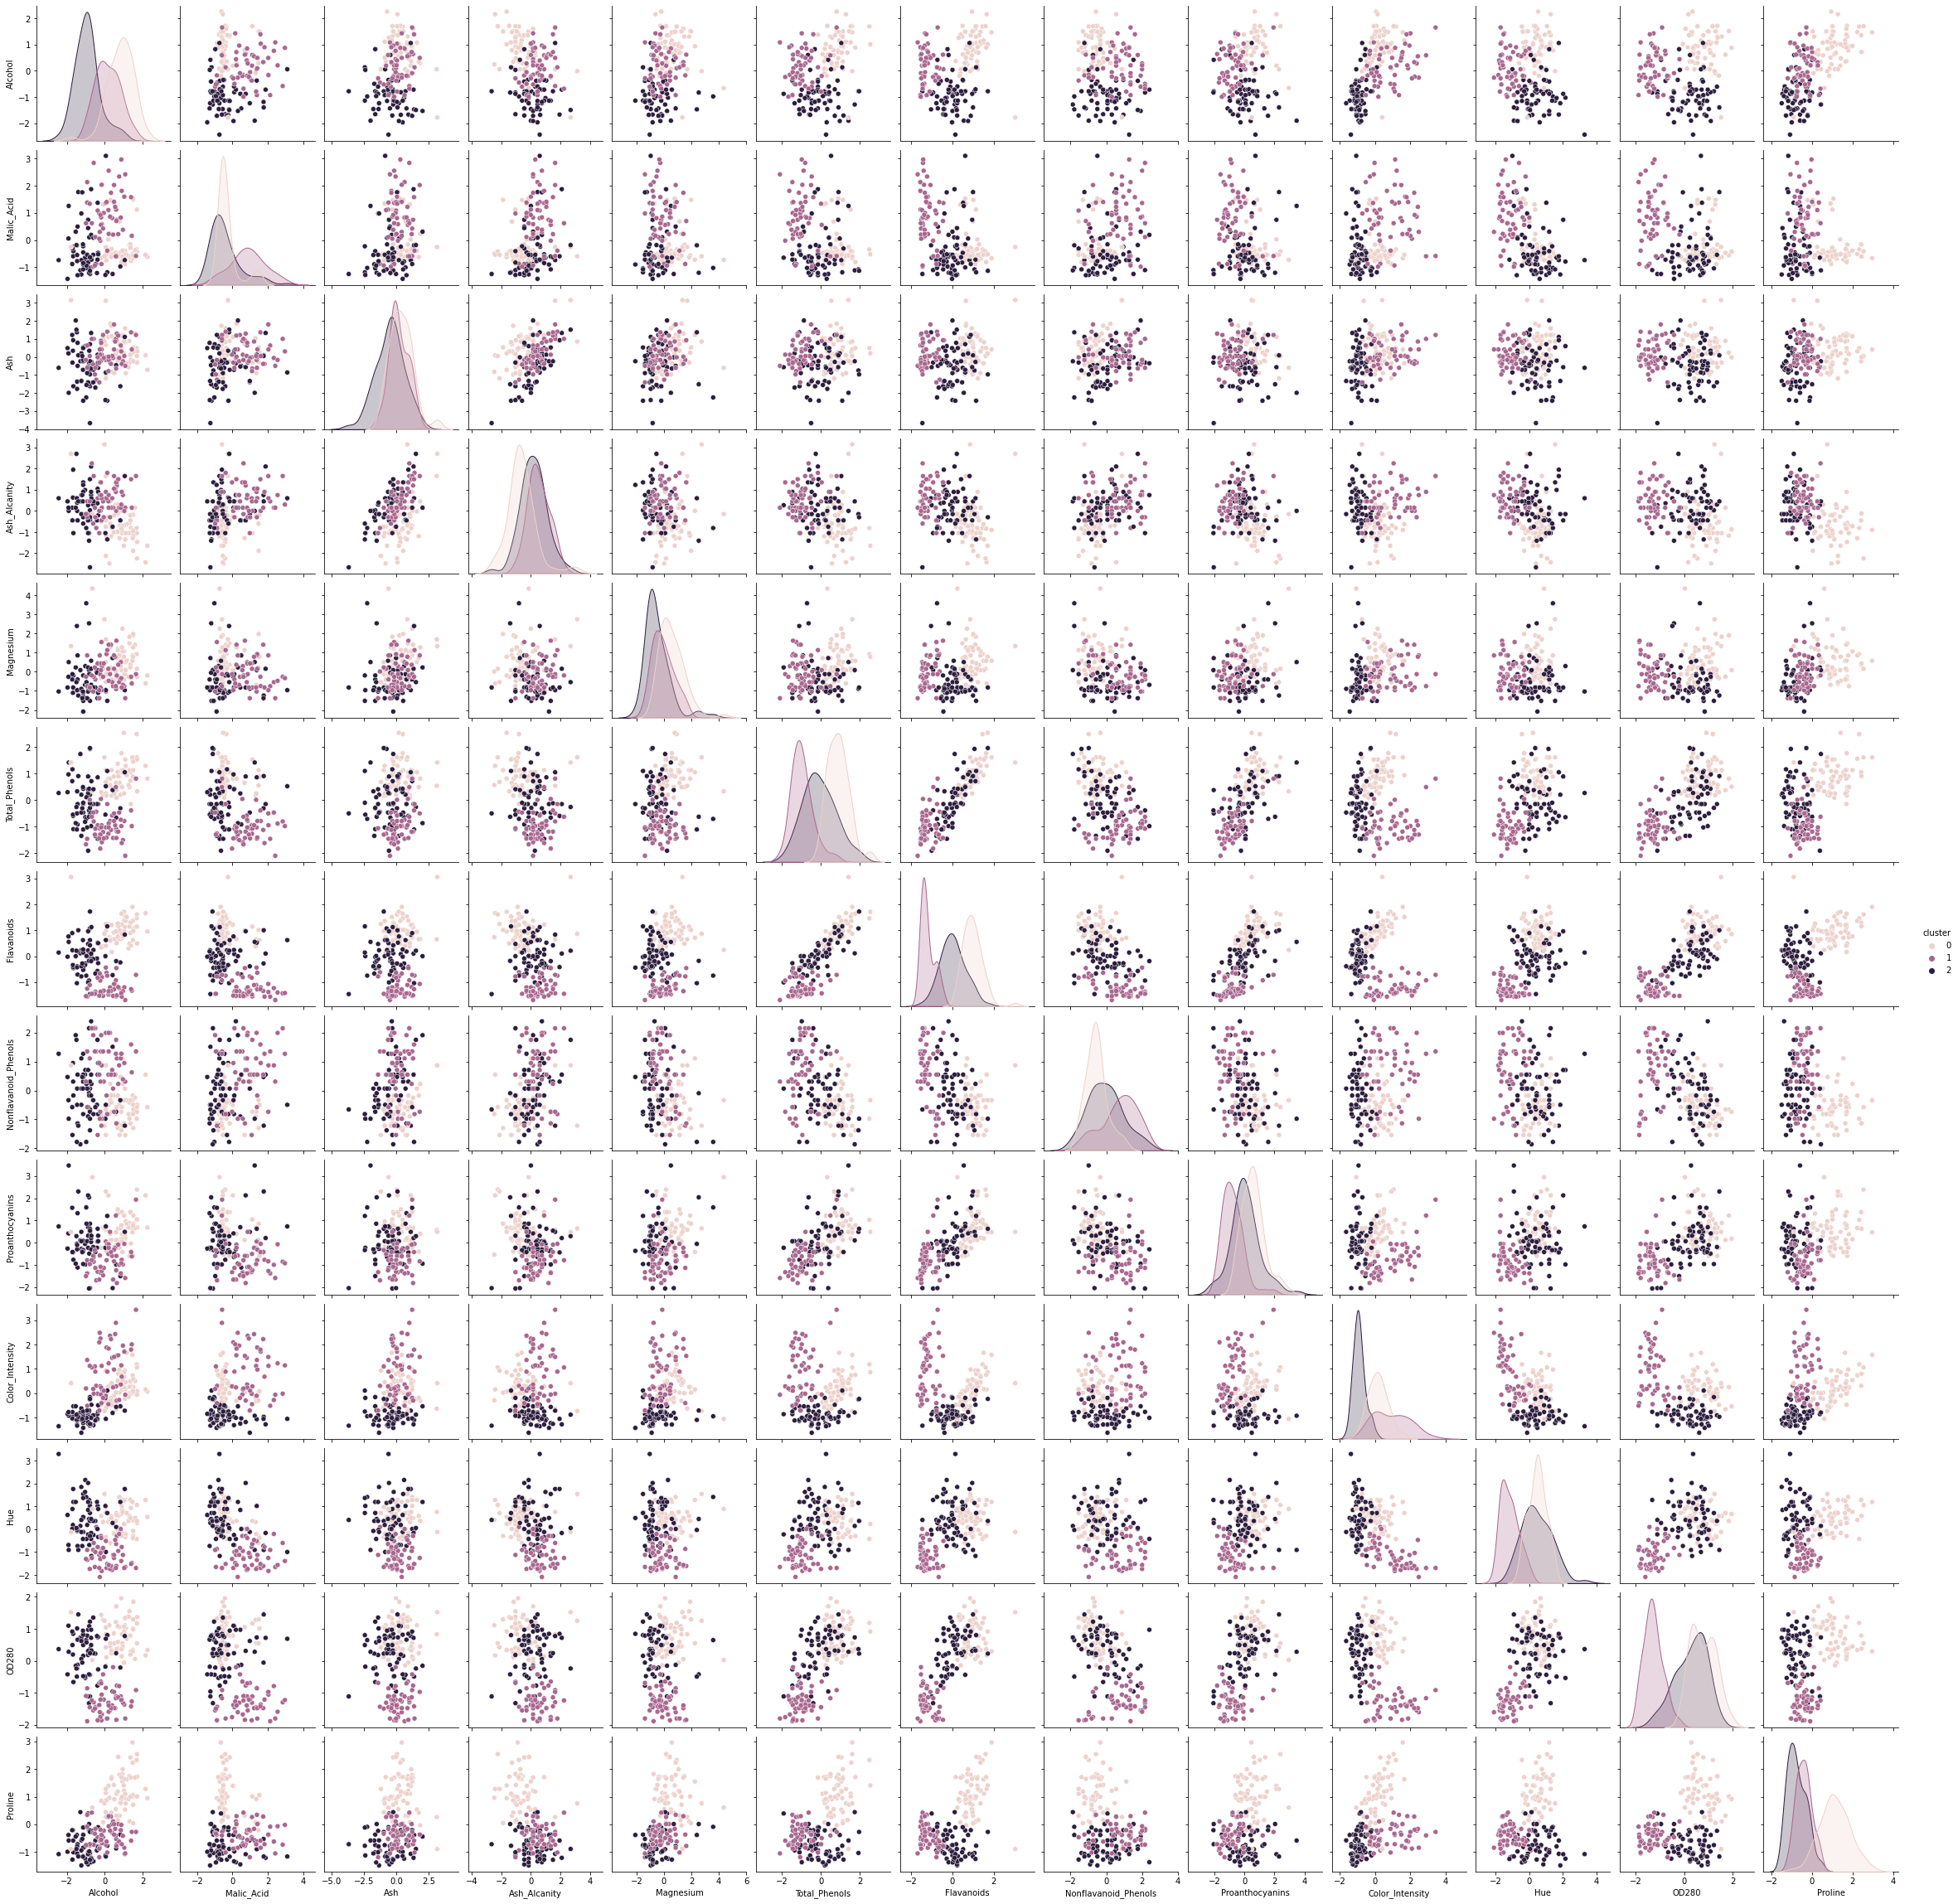

In [6]:
df = pd.read_csv('data/wine-clustering.csv')

# Нужно привести все показатели к одним единицам измерения
df = (df - df.mean()) / df.std()

# Кластеризуем
n = 3
model = KMeans(n)
df['cluster'] = model.fit_predict(df)

# Рисуем
sns.pairplot(df, hue='cluster')

Данные отчетливо разбиваются на 3 кластера

## Задача

Для датасета с вином найти оптимальное количество кластеров

In [7]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

In [10]:
df = df.drop('cluster', axis=1)

3 кластера - оптимально

Text(0.5, 1.0, 'Elbow method')

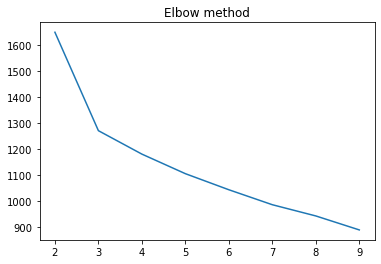

In [15]:
list_n = list(range(2, 10))
distances = [distance_by_n(df, n) for n in list_n]
plt.plot(list_n, distances)
plt.title('Elbow method')

## Задача

Применить иерархическую кластеризацию к датасету с вином. Визуализировать результат.

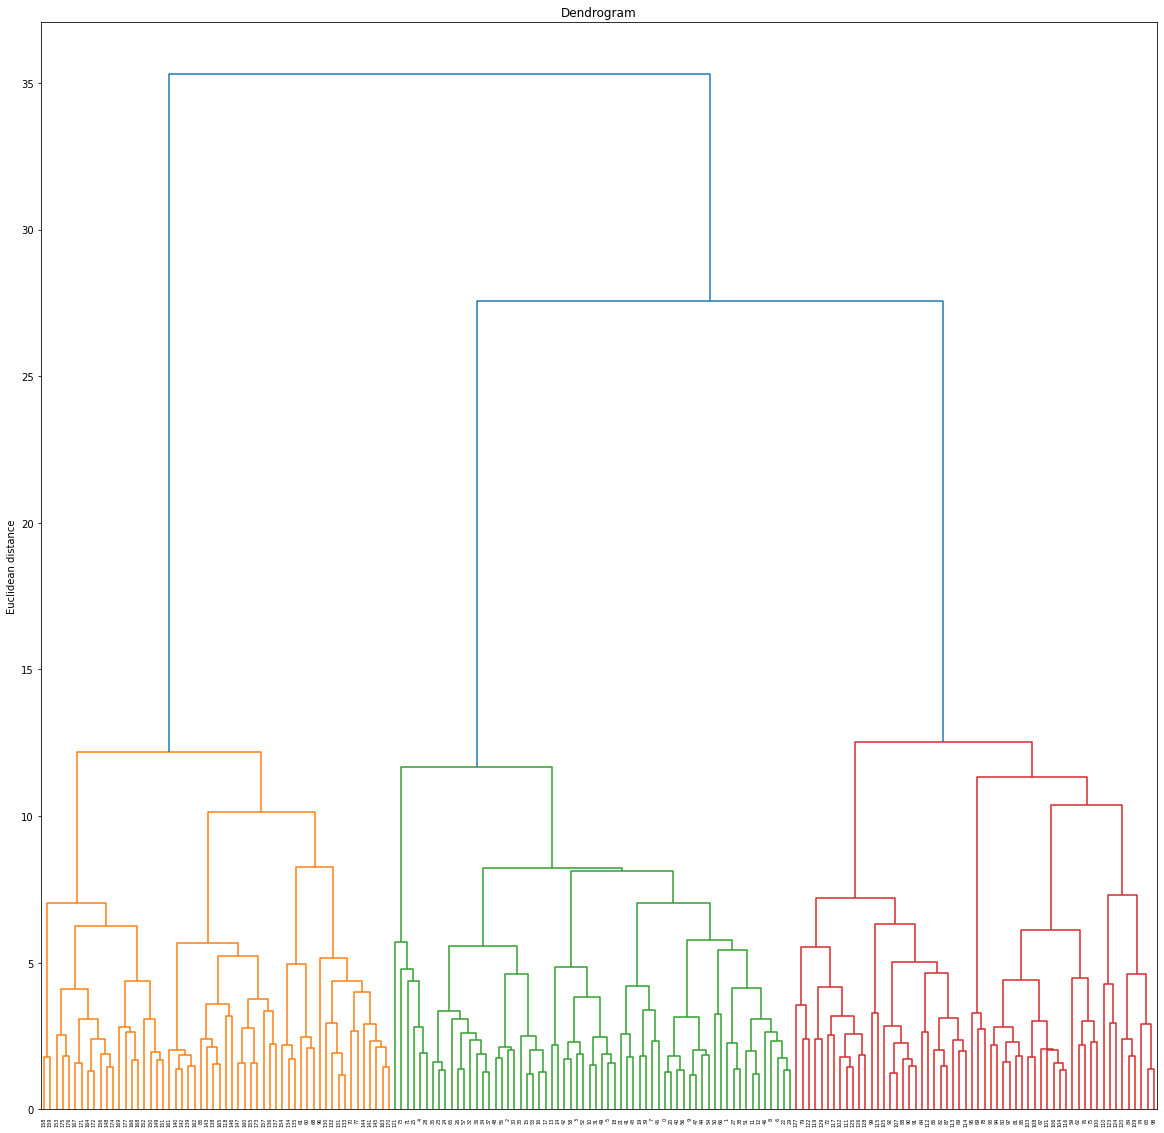

In [22]:
Z = linkage(df, method = 'ward')

#plotting dendrogram
plt.figure(figsize=(20, 20))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

## Задача

Спроецировать кластеризацию данных о вине в двумерное пространство, цветом отметить принадлежность к кластерам.

Сначала проведем кластеризацию, а потом применим PCA

Text(0.5, 1.0, 'PCA')

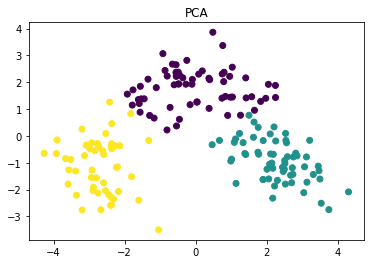

In [31]:
n = 3
model = KMeans(n)
labels = model.fit_predict(df)

pca = PCA(2)
pca_result = pca.fit_transform(df)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels)
plt.title('PCA')

Попробуем наоборот

Text(0.5, 1.0, 'PCA')

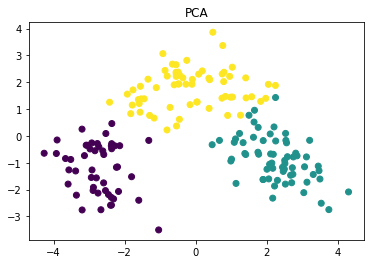

In [30]:
pca = PCA(2)
pca_result = pca.fit_transform(df)


n = 3
model = KMeans(n)
labels = model.fit_predict(pca_result)


plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels)
plt.title('PCA')

`pca.explained_variace_ratio_` вернет процент объясненной дисперсии по каждой из осей. Если посчитать сумму по всем осям, то это будет суммарный процент объясненной дисперсии.

In [39]:
pca.explained_variance_ratio_.sum()

0.5540633835693527

Свернув 13-мерное пространство в двумерное мы оставили 55% информации, а 45% потеряли.

Попробуем сохранить 80% информации.

In [47]:
pca = PCA(0.8)
pca_result = pca.fit_transform(df)
var = pca.explained_variance_ratio_
print(f'Всего объяснено: {var.sum():.2f}')
print(f'Количество осей: {len(var)}')

Всего объяснено: 0.80
Количество осей: 5
